In [2]:
import os
import sys

import pandas as pd

from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/'
files = os.listdir(folder)
print(files)


['.DS_Store', 'ER31122016-31122017.csv', 'ER20112019-16112020.csv', 'Malaysia', 'weekly_xy_detrend.csv', 'ER31122017-31122018.csv', 'China', 'ER31122018-19122019.csv', 'weekly_exchange_rate.csv', 'weekly_exchange_rate_detrend.csv', 'detrend_weekly_data.csv']


In [6]:
df = pd.DataFrame()
for f in files:
    if os.path.isdir(f) or f[:2]!='ER':
        continue
    print(f)
    df = df.append(pd.read_csv(folder+f, sep='|', skiprows=3))

print(df.shape)
df.sample(10)

ER31122016-31122017.csv
ER20112019-16112020.csv
ER31122017-31122018.csv
ER31122018-19122019.csv
(971, 4)


,Date,Average Buying Rates,Sight Bill,Transfer
134,20 Jul 2017,33.3864,33.4649,33.7929
19,30 Jan 2018,31.2082,31.2929,31.6209
195,18 Oct 2017,32.8419,32.9268,33.2640
77,25 Apr 2019,31.7897,31.8827,32.2320
36,24 Feb 2017,34.7218,34.8022,35.1431
185,25 Aug 2020,31.2228,31.3129,31.6520
40,28 Feb 2019,31.2190,31.3117,31.6416
15,25 Jan 2017,34.9765,35.0612,35.4270
188,06 Oct 2017,33.1771,33.2567,33.5799
99,30 May 2019,31.5412,31.6280,31.9715


In [7]:
df.columns = [c.strip() for c in df.columns]
df = df[pd.notnull(df.Date)]

In [8]:
df['date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df.head()

,Date,Average Buying Rates,Sight Bill,Transfer,date
0,04 Jan 2017,35.6326,35.7030,36.0715,2017-01-04
1,05 Jan 2017,35.5058,35.5907,35.9390,2017-01-05
2,06 Jan 2017,35.4467,35.5246,35.8859,2017-01-06
3,09 Jan 2017,35.5063,35.5631,35.9459,2017-01-09
4,10 Jan 2017,35.3556,35.4163,35.8036,2017-01-10


In [9]:
df.date.min(), df.date.max()

(Timestamp('2017-01-04 00:00:00'), Timestamp('2020-11-16 00:00:00'))

In [10]:
df.date.max() - df.date.min()

Timedelta('1412 days 00:00:00')

In [11]:
df.date.min() in [pd.to_datetime(df.date.iloc[0])]

True

In [13]:
ldates = df.date.apply(pd.to_datetime).tolist()

for d in [df.date.min() + timedelta(n) for n in range(1412)]:
    if d.date() not in ldates:
        print(d)

2017-01-07 00:00:00
2017-01-08 00:00:00
2017-01-14 00:00:00
2017-01-15 00:00:00
2017-01-21 00:00:00
2017-01-22 00:00:00
2017-01-28 00:00:00
2017-01-29 00:00:00
2017-02-04 00:00:00
2017-02-05 00:00:00
2017-02-11 00:00:00
2017-02-12 00:00:00
2017-02-13 00:00:00
2017-02-18 00:00:00
2017-02-19 00:00:00
2017-02-25 00:00:00
2017-02-26 00:00:00
2017-03-04 00:00:00
2017-03-05 00:00:00
2017-03-11 00:00:00
2017-03-12 00:00:00
2017-03-18 00:00:00
2017-03-19 00:00:00
2017-03-25 00:00:00
2017-03-26 00:00:00
2017-04-01 00:00:00
2017-04-02 00:00:00
2017-04-06 00:00:00
2017-04-08 00:00:00
2017-04-09 00:00:00
2017-04-13 00:00:00
2017-04-14 00:00:00
2017-04-15 00:00:00
2017-04-16 00:00:00
2017-04-22 00:00:00
2017-04-23 00:00:00
2017-04-29 00:00:00
2017-04-30 00:00:00
2017-05-01 00:00:00
2017-05-06 00:00:00
2017-05-07 00:00:00
2017-05-10 00:00:00
2017-05-13 00:00:00
2017-05-14 00:00:00
2017-05-20 00:00:00
2017-05-21 00:00:00
2017-05-27 00:00:00
2017-05-28 00:00:00
2017-06-03 00:00:00
2017-06-04 00:00:00


In [14]:
ldates

[Timestamp('2017-01-04 00:00:00'),
 Timestamp('2017-01-05 00:00:00'),
 Timestamp('2017-01-06 00:00:00'),
 Timestamp('2017-01-09 00:00:00'),
 Timestamp('2017-01-10 00:00:00'),
 Timestamp('2017-01-11 00:00:00'),
 Timestamp('2017-01-12 00:00:00'),
 Timestamp('2017-01-13 00:00:00'),
 Timestamp('2017-01-16 00:00:00'),
 Timestamp('2017-01-17 00:00:00'),
 Timestamp('2017-01-18 00:00:00'),
 Timestamp('2017-01-19 00:00:00'),
 Timestamp('2017-01-20 00:00:00'),
 Timestamp('2017-01-23 00:00:00'),
 Timestamp('2017-01-24 00:00:00'),
 Timestamp('2017-01-25 00:00:00'),
 Timestamp('2017-01-26 00:00:00'),
 Timestamp('2017-01-27 00:00:00'),
 Timestamp('2017-01-30 00:00:00'),
 Timestamp('2017-01-31 00:00:00'),
 Timestamp('2017-02-01 00:00:00'),
 Timestamp('2017-02-02 00:00:00'),
 Timestamp('2017-02-03 00:00:00'),
 Timestamp('2017-02-06 00:00:00'),
 Timestamp('2017-02-07 00:00:00'),
 Timestamp('2017-02-08 00:00:00'),
 Timestamp('2017-02-09 00:00:00'),
 Timestamp('2017-02-10 00:00:00'),
 Timestamp('2017-02-

In [18]:
figure_dir = '../../../plots/paper'
os.listdir(figure_dir)

['demand_mean_and_std.jpg',
 'weekly_CNY_exchange_rate_ts.jpg',
 'wv_count_ts.jpg',
 'weekly_MYR_exchange_rate_ts.jpg',
 '.DS_Store',
 'province_disagg_iv_baseline.jpg',
 'perc_abuse_by_industry.jpg',
 'ave_perc_abuse_boxplot.jpg',
 'provincial_demand_ts.jpg',
 'province_disagg_iv_stack.jpg',
 'province.pdf',
 'aggregate_demand_boxplot.jpg',
 'province_disagg_iv_increase.jpg',
 'aggregate_demand_ts.jpg',
 'weekly_USD_exchange_rate_ts_diff.jpg',
 'industry_mix_line.jpg',
 'weekly_USD_exchange_rate_ts.jpg',
 'daily_exchange_Rate_ts.jpg',
 'industry_mix_line_top10.jpg',
 'weekly_CNY_exchange_rate_ts_diff.jpg',
 'ave_perc_abuse_ts.jpg',
 'weekly_exchange_Rate_ts.jpg',
 'province_disagg_iv_increase_w_xticks.jpg',
 'demand_and_abuse_ts.jpg',
 'weekly_demand.jpg']

In [20]:
df.sort_values('date', inplace=True)

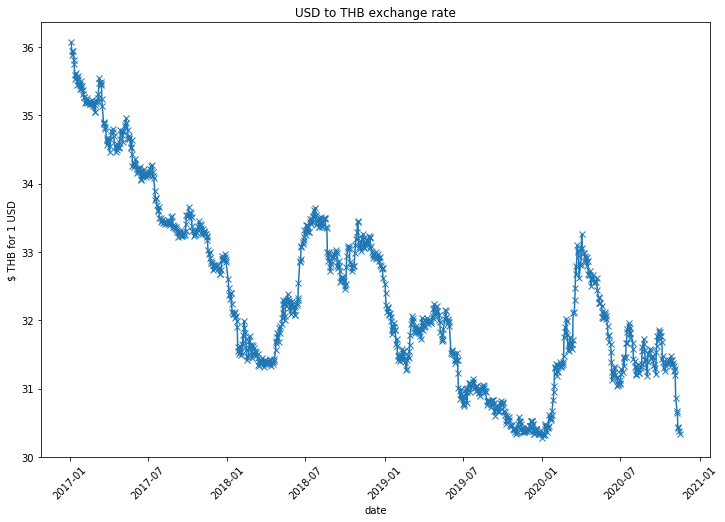

In [22]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df.date, df.Transfer, '-x')
plt.xticks(rotation=45)
plt.title('USD to THB exchange rate')
plt.xlabel('date')
plt.ylabel('$ THB for 1 USD')
plt.savefig(figure_dir + '/daily_exchange_Rate_ts.jpg')
plt.show()

In [24]:
df['week'] = df.date.apply(lambda x: x.isocalendar()[1]).apply(lambda x: '{:02d}'.format(x))
df['year'] = df.date.apply(lambda x: str(x.year))
df['year_week'] = df.year + '-' + df.week

In [26]:
df_weekly = df.groupby('year_week').mean()['Transfer'].reset_index().rename(columns={'Transfer':'ex_rate'})
def convert_year_week_to_date(year_week):
    year = int(year_week.split('-')[0])
    week = int(year_week.split('-')[1])
    return datetime(year,1,1) + timedelta(days=7*(week-1))
df_weekly['fake_date'] = df_weekly.year_week.apply(convert_year_week_to_date)

In [27]:
df_weekly.head()

,year_week,ex_rate,fake_date
0,2017-01,35.965467,2017-01-01
1,2017-02,35.725580,2017-01-08
2,2017-03,35.546960,2017-01-15
3,2017-04,35.431980,2017-01-22
4,2017-05,35.332080,2017-01-29


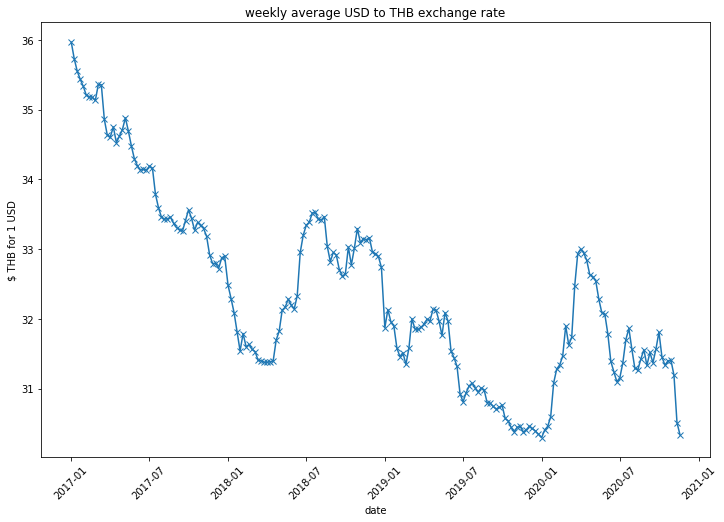

In [29]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df_weekly.fake_date, df_weekly.ex_rate, '-x')
plt.xticks(rotation=45)
plt.title('weekly average USD to THB exchange rate')
plt.xlabel('date')
plt.ylabel('$ THB for 1 USD')
plt.savefig(figure_dir+'/weekly_exchange_Rate_ts.jpg')
plt.show()

In [30]:
df_weekly.head()

,year_week,ex_rate,fake_date
0,2017-01,35.965467,2017-01-01
1,2017-02,35.725580,2017-01-08
2,2017-03,35.546960,2017-01-15
3,2017-04,35.431980,2017-01-22
4,2017-05,35.332080,2017-01-29


In [31]:
df_weekly.to_csv(folder + 'weekly_exchange_rate.csv', index=False)

In [32]:
weeks = df_weekly.year_week.tolist()

for w in range(1, 54):
    for y in [2017, 2018, 2019, 2020]:
        week = str(y) + '-' + '{:02d}'.format(w)
        if week not in weeks:
            print(week)


2020-48
2020-49
2020-50
2020-51
2020-52
2017-53
2018-53
2019-53
2020-53


In [37]:
df_weekly.year_week.max()

'2019-51'

In [58]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/'
df_weekly = pd.read_csv(folder + 'weekly_exchange_rate.csv')
df_weekly[df_weekly.duplicated('fake_date')]

,year_week,ex_rate,fake_date


<h2>plotting</h2>

In [12]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/'
df_weekly = pd.read_csv(folder + 'weekly_exchange_rate.csv')
df_weekly.head()

,year_week,ex_rate,fake_date
0,2017-01,35.965467,2017-01-01
1,2017-02,35.725580,2017-01-08
2,2017-03,35.546960,2017-01-15
3,2017-04,35.431980,2017-01-22
4,2017-05,35.332080,2017-01-29


In [13]:
min_wk = '2018-02'
max_wk = '2020-09'
df_weekly = df_weekly[(df_weekly.year_week>=min_wk) & (df_weekly.year_week<=max_wk)].reset_index(drop=True)
df_weekly.head()

,year_week,ex_rate,fake_date
0,2018-02,32.29036,2018-01-08
1,2018-03,32.08888,2018-01-15
2,2018-04,31.81748,2018-01-22
3,2018-05,31.53970,2018-01-29
4,2018-06,31.78962,2018-02-05


In [14]:
figure_dir = '../../../plots/paper'
os.listdir(figure_dir)[:3]

['aggregate_demand_shocks_ts.jpg',
 'demand_mean_and_std.jpg',
 'weekly_CNY_exchange_rate_ts.jpg']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


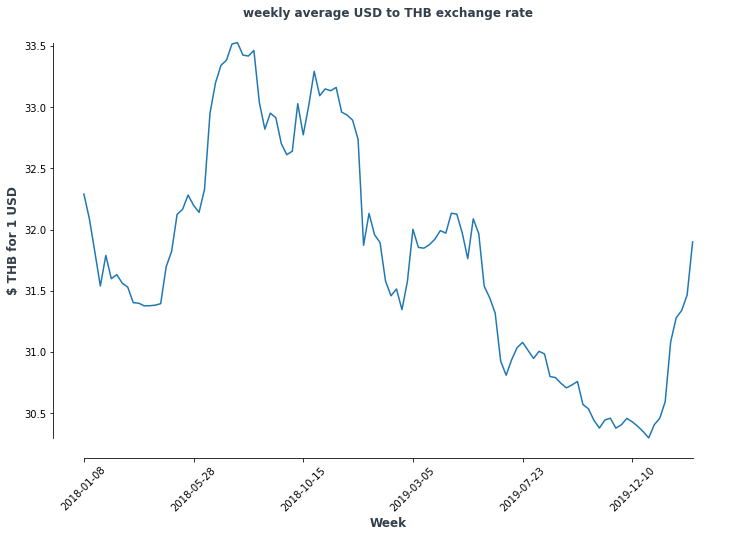

In [15]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

xtick_locs = range(0, df_weekly.shape[0], 20)
weeks = sorted(df_weekly.fake_date.tolist())
# weeks_label = [weeks[i].isoformat().split('T')[0] for i in xtick_locs]
weeks_label = [weeks[i].split('T')[0] for i in xtick_locs]

fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df_weekly.ex_rate, '-')
plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.title('weekly average USD to THB exchange rate', fontsize=12, fontweight='black', color = '#333F4B')
plt.xlabel('Week', fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('$ THB for 1 USD', fontsize=12, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig(figure_dir+'/weekly_USD_exchange_rate_ts.jpg')
plt.show()

In [16]:
df_weekly['first_diff'] = df_weekly.ex_rate - df_weekly.ex_rate.shift(1)
df_weekly.head()

,year_week,ex_rate,fake_date,first_diff
0,2018-02,32.29036,2018-01-08,NaN
1,2018-03,32.08888,2018-01-15,-0.20148
2,2018-04,31.81748,2018-01-22,-0.27140
3,2018-05,31.53970,2018-01-29,-0.27778
4,2018-06,31.78962,2018-02-05,0.24992


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  if sys.path[0] == '':


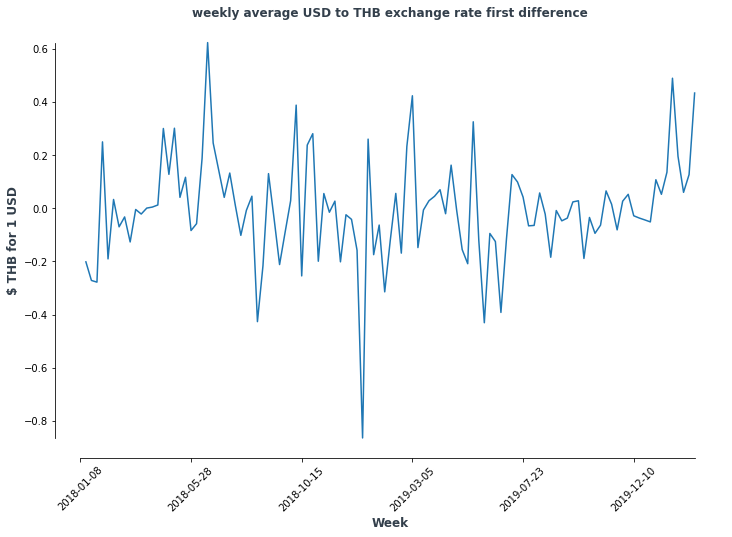

In [17]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df_weekly.first_diff, '-')
plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.title('weekly average USD to THB exchange rate first difference', 
          fontsize=12, fontweight='black', color = '#333F4B')
plt.xlabel('Week', fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('$ THB for 1 USD', fontsize=12, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig(figure_dir+'/weekly_USD_exchange_rate_ts_diff.jpg')
plt.show()

<h1>CNY - THB</h1>

In [40]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/China/'
files = os.listdir(folder)
files

['ER31122016-30122017.csv',
 'ER31122018-31122019.csv',
 'ER20112019-16112020.csv',
 'ER31122017-31122018.csv',
 'weekly_CNY_exchange_rate.csv']

In [41]:

df = pd.DataFrame()
for f in files:
    if f[:2]=='ER':
        df = df.append(pd.read_csv(folder+f, sep='|', skiprows=3))

df.columns = [c.strip() for c in df.columns]
df = df[pd.notnull(df.Date)]
df['date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))

df = df.sort_values('date')
print(df.shape)
df.sample(10)

(974, 5)


,Date,Average Buying Rates,Sight Bill,Transfer,date
44,07 Mar 2018,4.8768,4.9012,5.0140,2018-03-07
50,15 Mar 2018,4.8437,4.8733,5.0059,2018-03-15
45,09 Mar 2017,5.0266,5.0520,5.1693,2017-03-09
229,30 Oct 2020,4.5650,4.5971,4.7351,2020-10-30
69,11 Apr 2019,4.6370,4.6685,4.7894,2019-04-11
208,08 Nov 2017,4.9160,4.9379,5.0485,2017-11-08
117,14 May 2020,4.4260,4.4561,4.5836,2020-05-14
225,29 Nov 2018,4.6547,4.6819,4.7897,2018-11-29
95,23 May 2018,4.9483,4.9738,5.0992,2018-05-23
126,27 May 2020,4.3652,4.3967,4.5211,2020-05-27


In [42]:
df.head()

,Date,Average Buying Rates,Sight Bill,Transfer,date
0,04 Jan 2017,5.0700,5.0943,5.2345,2017-01-04
1,05 Jan 2017,5.1002,5.1285,5.2473,2017-01-05
2,06 Jan 2017,5.1234,5.1517,5.2636,2017-01-06
3,09 Jan 2017,5.1050,5.1321,5.2548,2017-01-09
4,10 Jan 2017,5.0764,5.1068,5.2312,2017-01-10


In [43]:
df.tail()

,Date,Average Buying Rates,Sight Bill,Transfer,date
236,10 Nov 2020,4.5122,4.5478,4.6964,2020-11-10
237,11 Nov 2020,4.4820,4.5194,4.6796,2020-11-11
238,12 Nov 2020,4.4765,4.5106,4.6538,2020-11-12
239,13 Nov 2020,4.4893,4.5151,4.6356,2020-11-13
240,16 Nov 2020,4.4980,4.5275,4.6545,2020-11-16


In [47]:
df = df[~df.duplicated('date')]

In [48]:
df['week'] = df.date.apply(lambda x: x.isocalendar()[1]).apply(lambda x: '{:02d}'.format(x))
df['year'] = df.date.apply(lambda x: str(x.year))
df['year_week'] = df.year + '-' + df.week

df_weekly = df.groupby('year_week').mean()['Transfer'].reset_index().rename(columns={'Transfer':'ex_rate'})
def convert_year_week_to_date(year_week):
    year = int(year_week.split('-')[0])
    week = int(year_week.split('-')[1])
    return datetime(year,1,1) + timedelta(days=7*(week-1))
df_weekly['fake_date'] = df_weekly.year_week.apply(convert_year_week_to_date)
df_weekly.head()

,year_week,ex_rate,fake_date
0,2017-01,5.248467,2017-01-01
1,2017-02,5.220900,2017-01-08
2,2017-03,5.226160,2017-01-15
3,2017-04,5.216400,2017-01-22
4,2017-05,5.190020,2017-01-29


In [49]:
df.head()

,Date,Average Buying Rates,Sight Bill,Transfer,date,week,year,year_week
0,04 Jan 2017,5.0700,5.0943,5.2345,2017-01-04,01,2017,2017-01
1,05 Jan 2017,5.1002,5.1285,5.2473,2017-01-05,01,2017,2017-01
2,06 Jan 2017,5.1234,5.1517,5.2636,2017-01-06,01,2017,2017-01
3,09 Jan 2017,5.1050,5.1321,5.2548,2017-01-09,02,2017,2017-02
4,10 Jan 2017,5.0764,5.1068,5.2312,2017-01-10,02,2017,2017-02


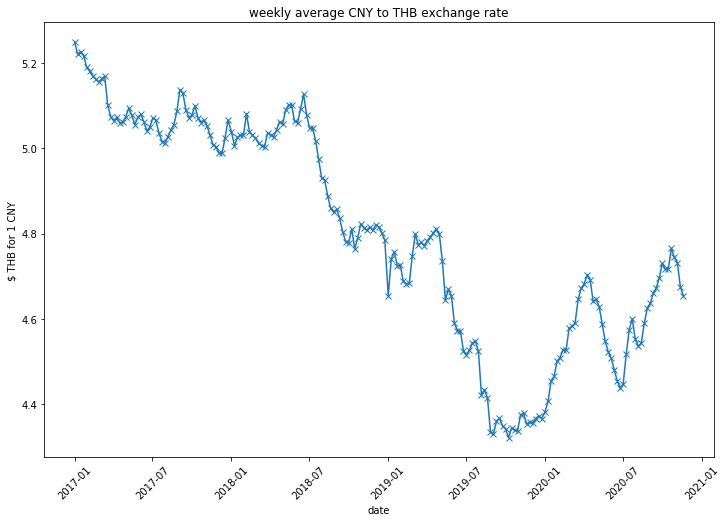

In [50]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df_weekly.fake_date, df_weekly.ex_rate, '-x')
plt.xticks(rotation=45)
plt.title('weekly average CNY to THB exchange rate')
plt.xlabel('date')
plt.ylabel('$ THB for 1 CNY')
plt.savefig(figure_dir+'/weekly_CNY_exchange_rate_ts.jpg')
plt.show()

In [51]:
df_weekly.to_csv(folder + 'weekly_CNY_exchange_rate.csv', index=False)

<h2>for plotting</h2>

In [18]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/China/'
df_weekly = pd.read_csv(folder + 'weekly_CNY_exchange_rate.csv')
df_weekly.head()

,year_week,ex_rate,fake_date
0,2017-01,5.248467,2017-01-01
1,2017-02,5.220900,2017-01-08
2,2017-03,5.226160,2017-01-15
3,2017-04,5.216400,2017-01-22
4,2017-05,5.190020,2017-01-29


In [19]:
min_wk = '2018-02'
max_wk = '2020-09'
df_weekly = df_weekly[(df_weekly.year_week>=min_wk) & (df_weekly.year_week<=max_wk)].reset_index(drop=True)
print(df_weekly.shape[0])
df_weekly.head()

112


,year_week,ex_rate,fake_date
0,2018-02,5.00602,2018-01-08
1,2018-03,5.02540,2018-01-15
2,2018-04,5.03024,2018-01-22
3,2018-05,5.03048,2018-01-29
4,2018-06,5.08050,2018-02-05


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.


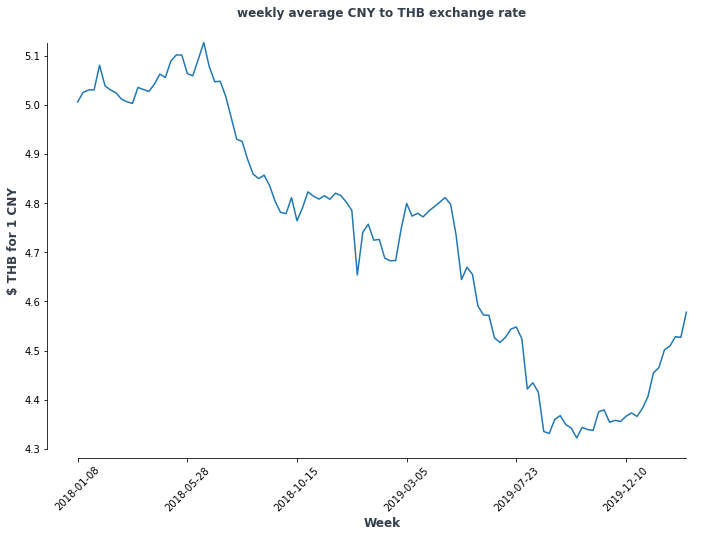

In [20]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

xtick_locs = range(0, df_weekly.shape[0], 20)
# weeks = sorted(df_weekly.fake_date.tolist())
# weeks_label = [weeks[i] for i in xtick_locs]

fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df_weekly.ex_rate, '-')
plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.title('weekly average CNY to THB exchange rate', fontsize=12, fontweight='black', color = '#333F4B')
plt.xlabel('Week', fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('$ THB for 1 CNY', fontsize=12, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig(figure_dir+'/weekly_CNY_exchange_rate_ts.jpg')
plt.show()

In [21]:
df_weekly['first_diff'] = df_weekly.ex_rate - df_weekly.ex_rate.shift(1)
df_weekly.head()

,year_week,ex_rate,fake_date,first_diff
0,2018-02,5.00602,2018-01-08,NaN
1,2018-03,5.02540,2018-01-15,0.01938
2,2018-04,5.03024,2018-01-22,0.00484
3,2018-05,5.03048,2018-01-29,0.00024
4,2018-06,5.08050,2018-02-05,0.05002


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  if sys.path[0] == '':


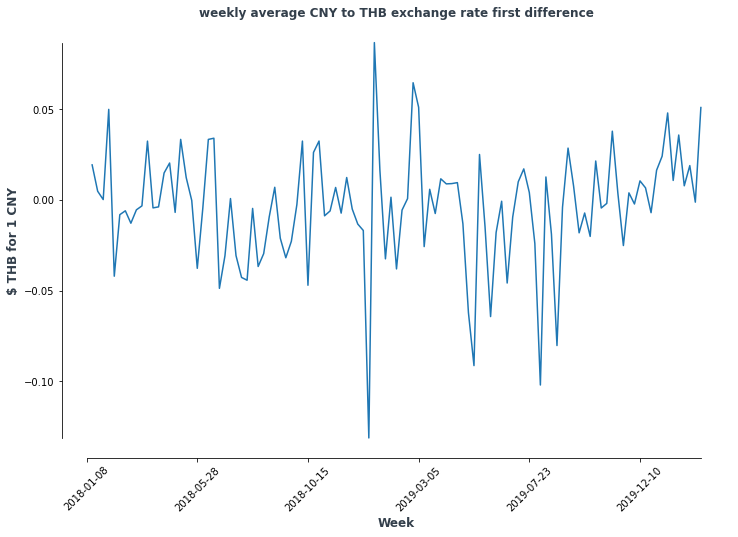

In [22]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df_weekly.first_diff, '-')
plt.xticks(ticks=xtick_locs, labels=weeks_label, rotation='45')
plt.title('weekly average CNY to THB exchange rate first difference', 
          fontsize=12, fontweight='black', color = '#333F4B')
plt.xlabel('Week', fontsize=12, fontweight='black', color = '#333F4B')
plt.ylabel('$ THB for 1 CNY', fontsize=12, fontweight='black', color = '#333F4B')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)

plt.savefig(figure_dir+'/weekly_CNY_exchange_rate_ts_diff.jpg')
plt.show()

<h1>Malaysia</h1>

In [27]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/Malaysia/'
files = os.listdir(folder)
files

['ER31122018-31122019.csv',
 'ER31122016-31122017.csv',
 'ER31122017-31122018.csv']

In [28]:

df = pd.DataFrame()
for f in files:
    df = df.append(pd.read_csv(folder+f, sep='|', skiprows=3))

df.columns = [c.strip() for c in df.columns]
df = df[pd.notnull(df.Date)]
df['date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))

df = df.sort_values('date')
print(df.shape)
df.sample(10)

(733, 5)


,Date,Average Buying Rates,Sight Bill,Transfer,date
181,27 Sep 2017,7.7378,7.7827,7.9997,2017-09-27
57,25 Mar 2019,7.6096,7.6527,7.8748,2019-03-25
150,15 Aug 2019,7.2061,7.2523,7.4638,2019-08-15
214,14 Nov 2018,7.7038,7.7455,7.9584,2018-11-14
228,04 Dec 2018,7.7162,7.7612,7.9760,2018-12-04
220,25 Nov 2019,7.0790,7.1279,7.3401,2019-11-25
194,16 Oct 2018,7.7044,7.7523,7.9709,2018-10-16
195,17 Oct 2018,7.6767,7.7260,7.9502,2018-10-17
59,29 Mar 2017,7.6638,7.7044,7.9142,2017-03-29
225,01 Dec 2017,7.8329,7.8740,8.1071,2017-12-01


In [29]:
df.head()

,Date,Average Buying Rates,Sight Bill,Transfer,date
0,04 Jan 2017,7.8296,7.8790,8.0986,2017-01-04
1,05 Jan 2017,7.8215,7.8640,8.0977,2017-01-05
2,06 Jan 2017,7.8291,7.8710,8.0838,2017-01-06
3,09 Jan 2017,7.8476,7.8889,8.0948,2017-01-09
4,10 Jan 2017,7.8107,7.8571,8.0707,2017-01-10


In [30]:
df.tail()

,Date,Average Buying Rates,Sight Bill,Transfer,date
239,24 Dec 2019,7.1326,7.1798,7.3964,2019-12-24
240,25 Dec 2019,7.1366,7.1863,7.3990,2019-12-25
241,26 Dec 2019,7.1316,7.1819,7.4011,2019-12-26
242,27 Dec 2019,7.1480,7.1942,7.4122,2019-12-27
243,30 Dec 2019,7.1708,7.2154,7.4290,2019-12-30


In [31]:
df['week'] = df.date.apply(lambda x: x.isocalendar()[1]).apply(lambda x: '{:02d}'.format(x))
df['year'] = df.date.apply(lambda x: str(x.year))
df['year_week'] = df.year + '-' + df.week

df_weekly = df.groupby('year_week').mean()['Transfer'].reset_index().rename(columns={'Transfer':'ex_rate'})
def convert_year_week_to_date(year_week):
    year = int(year_week.split('-')[0])
    week = int(year_week.split('-')[1])
    return datetime(year,1,1) + timedelta(days=7*(week-1))
df_weekly['fake_date'] = df_weekly.year_week.apply(convert_year_week_to_date)
df_weekly.head()

,year_week,ex_rate,fake_date
0,2017-01,8.093367,2017-01-01
1,2017-02,8.065760,2017-01-08
2,2017-03,8.051780,2017-01-15
3,2017-04,8.058940,2017-01-22
4,2017-05,8.047000,2017-01-29


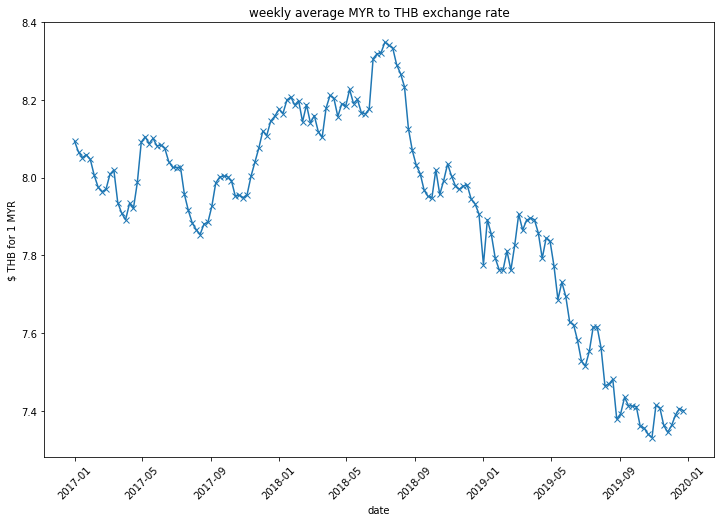

In [32]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
plt.plot(df_weekly.fake_date, df_weekly.ex_rate, '-x')
plt.xticks(rotation=45)
plt.title('weekly average MYR to THB exchange rate')
plt.xlabel('date')
plt.ylabel('$ THB for 1 MYR')
plt.savefig('../../plots/paper/weekly_MYR_exchange_rate_ts.jpg')
plt.show()

In [33]:
df_weekly.to_csv(folder + 'weekly_MYR_exchange_rate.csv', index=False)

<h1>Detrend</h1>

In [2]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/'
df_weekly = pd.read_csv(folder + 'weekly_exchange_rate.csv')
df_weekly.head()

,year_week,ex_rate,fake_date
0,2017-01,35.965467,2017-01-01
1,2017-02,35.725580,2017-01-08
2,2017-03,35.546960,2017-01-15
3,2017-04,35.431980,2017-01-22
4,2017-05,35.332080,2017-01-29


In [3]:
import numpy as np
X = np.array(df_weekly.index.tolist()).reshape(-1, 1) 
y = df_weekly.ex_rate.tolist()

In [4]:
from sklearn.linear_model import LinearRegression as LM
reg = LM().fit(X, y)
y_hat = reg.predict(X)

df_weekly['trend'] = y_hat
df_weekly['dt_ex_rate'] = df_weekly.ex_rate - y_hat

In [5]:
df_weekly.head()

,year_week,ex_rate,fake_date,trend,dt_ex_rate
0,2017-01,35.965467,2017-01-01,34.688232,1.277235
1,2017-02,35.725580,2017-01-08,34.661450,1.064130
2,2017-03,35.546960,2017-01-15,34.634669,0.912291
3,2017-04,35.431980,2017-01-22,34.607887,0.824093
4,2017-05,35.332080,2017-01-29,34.581105,0.750975


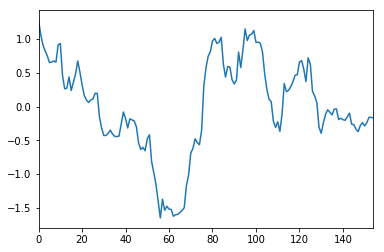

In [6]:
df_weekly.dt_ex_rate.plot()
plt.show()

In [52]:
df_weekly.to_csv(folder + 'weekly_exchange_rate_detrend.csv', index=False)

<h1>demand trend</h1>

In [42]:
file_folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/regression_data/filled_zero/'
weekly_data = pd.read_csv(file_folder+"weekly_time_fe.csv")
weekly_data.head()

,Location,year_week,total_demand,perc_abuse,wv_count,total_demand_lag_m1,total_demand_lag_m2,total_demand_lag_m3,total_demand_lag_m4,total_demand_lag_1,...,log_total_demand_lag_m4,log_total_demand_lag_1,log_total_demand_lag_2,log_total_demand_lag_3,log_total_demand_lag_4,ex_rate,fake_date,month,quarter,year
0,Ang Thong,2017-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.965467,2017-01-01,2017-01,2017-01,2017
1,Ang Thong,2017-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.725580,2017-01-08,2017-01,2017-01,2017
2,Ang Thong,2017-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.546960,2017-01-15,2017-01,2017-01,2017
3,Ang Thong,2017-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.431980,2017-01-22,2017-01,2017-01,2017
4,Ang Thong,2017-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,35.332080,2017-01-29,2017-01,2017-01,2017


In [12]:
unique_weeks = sorted(weekly_data.year_week.unique())
week_index_dict = {k:v for k, v in zip(unique_weeks, range(len(unique_weeks)))}

In [32]:
import numpy as np

X = np.array(weekly_data.year_week.apply(lambda x: week_index_dict[x])).reshape(-1, 1) 
demand_y = weekly_data.total_demand.tolist()

In [33]:
reg = LM().fit(X, demand_y)
demand_y_hat = reg.predict(X)


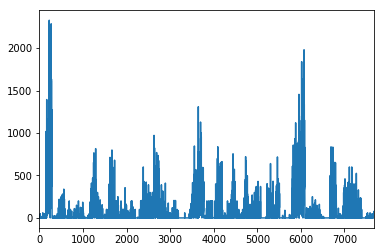

In [21]:
weekly_data.total_demand.plot()
plt.show()

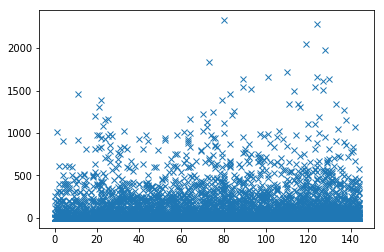

In [25]:
# demand trend
plt.plot(X, demand_y, 'x')
plt.show()

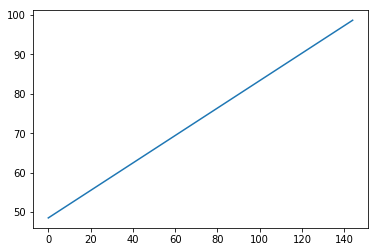

In [23]:
# demand trend
plt.plot(X, demand_y_hat)
plt.show()

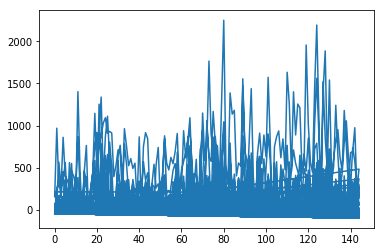

In [35]:
plt.plot(X, demand_y - demand_y_hat)
plt.show()

<h1>abuse trend</h1>

In [29]:
abuse_y = weekly_data.perc_abuse.tolist()
reg = LM().fit(X, abuse_y)
abuse_y_hat = reg.predict(X)


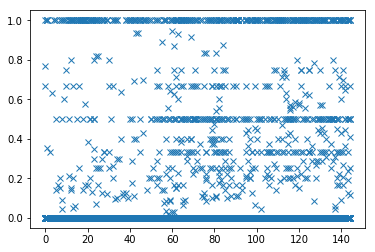

In [26]:
# abuse trend
plt.plot(X, abuse_y, 'x')
plt.show()

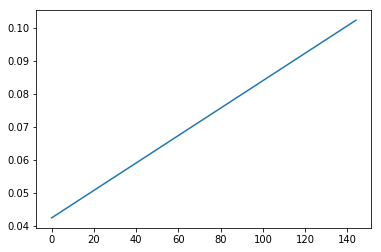

In [30]:
# abuse trend
plt.plot(X, abuse_y_hat)
plt.show()

In [43]:
# put into dataset
weekly_data['demand_trend'] = demand_y_hat
weekly_data['demand_resid'] = demand_y - demand_y_hat
weekly_data['abuse_trend'] = abuse_y_hat
weekly_data['abuse_resid'] = abuse_y - abuse_y_hat

In [44]:
weekly_data.head()

,Location,year_week,total_demand,perc_abuse,wv_count,total_demand_lag_m1,total_demand_lag_m2,total_demand_lag_m3,total_demand_lag_m4,total_demand_lag_1,...,log_total_demand_lag_4,ex_rate,fake_date,month,quarter,year,demand_trend,demand_resid,abuse_trend,abuse_resid
0,Ang Thong,2017-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.965467,2017-01-01,2017-01,2017-01,2017,48.539056,-48.539056,0.042396,-0.042396
1,Ang Thong,2017-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.725580,2017-01-08,2017-01,2017-01,2017,48.886770,-48.886770,0.042812,-0.042812
2,Ang Thong,2017-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.546960,2017-01-15,2017-01,2017-01,2017,49.234485,-49.234485,0.043228,-0.043228
3,Ang Thong,2017-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.431980,2017-01-22,2017-01,2017-01,2017,49.582199,-49.582199,0.043643,-0.043643
4,Ang Thong,2017-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.332080,2017-01-29,2017-01,2017-01,2017,49.929914,-49.929914,0.044059,-0.044059


In [46]:
file_folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/regression_data/filled_zero/'
weekly_data.to_csv(file_folder + 'weekly_xy_detrend.csv', index=False)

In [45]:
weekly_data.to_csv(folder + 'weekly_xy_detrend.csv', index=False)

In [47]:
weekly_data.head()

,Location,year_week,total_demand,perc_abuse,wv_count,total_demand_lag_m1,total_demand_lag_m2,total_demand_lag_m3,total_demand_lag_m4,total_demand_lag_1,...,log_total_demand_lag_4,ex_rate,fake_date,month,quarter,year,demand_trend,demand_resid,abuse_trend,abuse_resid
0,Ang Thong,2017-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.965467,2017-01-01,2017-01,2017-01,2017,48.539056,-48.539056,0.042396,-0.042396
1,Ang Thong,2017-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.725580,2017-01-08,2017-01,2017-01,2017,48.886770,-48.886770,0.042812,-0.042812
2,Ang Thong,2017-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.546960,2017-01-15,2017-01,2017-01,2017,49.234485,-49.234485,0.043228,-0.043228
3,Ang Thong,2017-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.431980,2017-01-22,2017-01,2017-01,2017,49.582199,-49.582199,0.043643,-0.043643
4,Ang Thong,2017-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35.332080,2017-01-29,2017-01,2017-01,2017,49.929914,-49.929914,0.044059,-0.044059


In [48]:
folder = '/Users/boyuliu/Dropbox/Boyu-Joann/Data/exchange_rate/'
dt_ex_rate = pd.read_csv(folder + 'weekly_exchange_rate_detrend.csv')
dt_ex_rate = dt_ex_rate.drop(['ex_rate','fake_date'], axis=1)
detrend_weekly = pd.merge(weekly_data, dt_ex_rate, on='year_week', how='left', indicator=True)
print(detrend_weekly._merge.value_counts())
detrend_weekly.head()

both          7685
right_only       0
left_only        0
Name: _merge, dtype: int64


,Location,year_week,total_demand,perc_abuse,wv_count,total_demand_lag_m1,total_demand_lag_m2,total_demand_lag_m3,total_demand_lag_m4,total_demand_lag_1,...,month,quarter,year,demand_trend,demand_resid,abuse_trend,abuse_resid,trend,dt_ex_rate,_merge
0,Ang Thong,2017-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017-01,2017-01,2017,48.539056,-48.539056,0.042396,-0.042396,34.688232,1.277235,both
1,Ang Thong,2017-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017-01,2017-01,2017,48.886770,-48.886770,0.042812,-0.042812,34.661450,1.064130,both
2,Ang Thong,2017-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017-01,2017-01,2017,49.234485,-49.234485,0.043228,-0.043228,34.634669,0.912291,both
3,Ang Thong,2017-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017-01,2017-01,2017,49.582199,-49.582199,0.043643,-0.043643,34.607887,0.824093,both
4,Ang Thong,2017-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2017-01,2017-01,2017,49.929914,-49.929914,0.044059,-0.044059,34.581105,0.750975,both


In [49]:
detrend_weekly.to_csv(file_folder + 'weekly_all_detrend.csv', index=False)

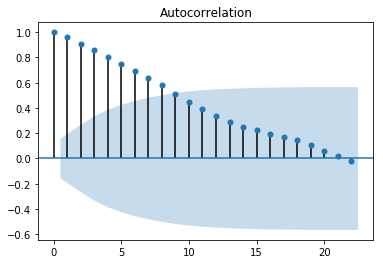

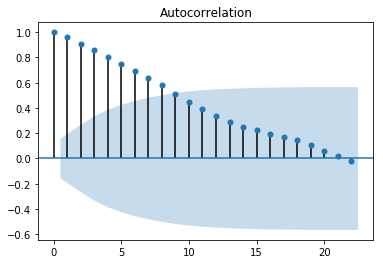

In [55]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dt_ex_rate.dt_ex_rate)

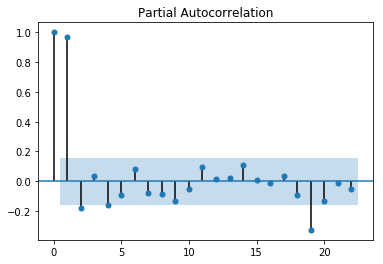

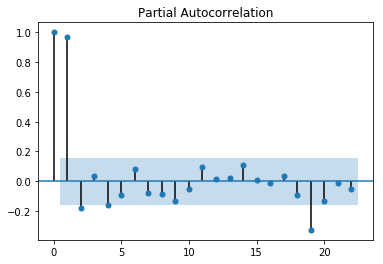

In [56]:
plot_pacf(dt_ex_rate.dt_ex_rate)

In [57]:
dt_ex_rate

,year_week,trend,dt_ex_rate
0,2017-01,34.688232,1.277235
1,2017-02,34.661450,1.064130
2,2017-03,34.634669,0.912291
3,2017-04,34.607887,0.824093
4,2017-05,34.581105,0.750975
...,...,...,...
150,2019-47,30.670985,-0.288205
151,2019-48,30.644203,-0.238423
152,2019-49,30.617421,-0.159071
153,2019-50,30.590640,-0.160440
